哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [1]:
import pandas as pd 

In [2]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
A = pd.read_csv("A_lvr_land_A.csv")
B = pd.read_csv("B_lvr_land_A.csv")
E = pd.read_csv("E_lvr_land_A.csv")
F = pd.read_csv("F_lvr_land_A.csv")

C:\Users\apply\anaconda3\envs\datascience3.6\lib\site-packages\IPython\core\interactiveshell.py:3156: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
F

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
0,The villages and towns urban district,transaction sign,land sector position building sector house num...,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,...,the unit price (NTD / square meter),the berth category,berth shifting total area square meter,the berth total price NTD,the note,serial number,NaN,NaN,NaN,NaN
1,板橋區,房地(土地+建物),新北市板橋區南雅東路1~30號,9.76,商,NaN,NaN,1090405,土地2建物1車位0,六層,...,125589,NaN,0.0,0,含增建或未登記建物。;,RPQNMLMKNHPFFAF08CA,47.45,0.00,8.10,NaN
2,板橋區,房地(土地+建物)+車位,新北市板橋區縣民大道三段270巷1~30號,24.18,工,NaN,NaN,1090401,土地1建物1車位1,八層,...,113039,坡道平面,38.09,0,含增建或未登記建物。;,RPRNMLMKNHPFFAF18CA,116.29,0.00,11.80,NaN
3,板橋區,房地(土地+建物),新北市板橋區南雅南路一段1~30號,3.2,商,NaN,NaN,1090316,土地1建物1車位0,十一層,...,99489,NaN,0.0,0,含增建或未登記建物。;,RPTNMLMKNHPFFAF38CA,23.02,0.00,4.94,NaN
4,板橋區,房地(土地+建物),新北市板橋區金門街103巷1~30號,32.58,住,NaN,NaN,1090410,土地2建物1車位0,二層,...,88944,NaN,0.0,0,含增建或未登記建物。;,RPSNMLNKNHPFFAF38CA,80.55,0.00,16.14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19814,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080817,土地2建物1車位1,十三層,...,58059.0,坡道平面,30.31,1100000,預售屋、或土地及建物分次登記案件;,RPXNMLOJRHPFFIF57DA,73.39,2.65,8.52,有
19815,三峽區,土地,成福段成福小段331~360地號,762.0,NaN,山坡地保育區,農牧用地,1090814,土地2建物0車位0,NaN,...,2100.0,NaN,0.0,0,親友、員工、共有人或其他特殊關係間之交易;,RPQNMLRLQHPFFIF27DA,0.00,0.00,0.00,無
19816,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080831,土地2建物1車位1,四層,...,61010.0,坡道平面,30.31,1400000,預售屋、或土地及建物分次登記案件;,RPSPMLLLQHPFFIF07DA,73.40,2.64,8.52,有
19817,鶯歌區,房地(土地+建物)+車位,中山路301~330號,19.85,其他,NaN,NaN,1090809,土地1建物1車位1,七層,...,66606.0,坡道平面,24.14,0,NaN,RPUOMLRKQHPFFIF67DA,51.72,0.00,5.40,有


In [4]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
A = A.iloc[1:]
B = B.iloc[1:]
E = E.iloc[1:]
F = F.iloc[1:]

In [5]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
A['city'] = 'Taipei'
F['city'] = 'New_Taipei'
B['city'] = 'Taichung'
E['city'] = 'Kaohsiung'

C:\Users\apply\anaconda3\envs\datascience3.6\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
#4. 將以上四份資料運用pd.concat()串接
data = pd.concat([A,F,B,E],0)
data

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,city
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14129,三民區,房地(土地+建物),建興路380巷1弄1~30號,32.0,其他,NaN,NaN,1090727,土地1建物1車位0,四層,...,NaN,0.0,0,NaN,RPSPMLLLQHPFFDE09DA,101.29,0.00,7.12,NaN,Kaohsiung
14130,三民區,房地(土地+建物)+車位,民族巷1~30號,7.01,其他,NaN,NaN,1090816,土地1建物1車位1,十三層,...,坡道平面,6.25,800000,NaN,RPPQMLKLQHPFFDE78DA,51.16,9.73,0.00,NaN,Kaohsiung
14131,三民區,房地(土地+建物)+車位,大豐一路331~360號,27.23,其他,NaN,NaN,1090722,土地1建物1車位1,三層,...,坡道機械,0.0,0,NaN,RPSOMLSKQHPFFDE96DA,101.03,6.24,0.00,NaN,Kaohsiung
14132,三民區,房地(土地+建物)+車位,民族巷31~60號,10.32,其他,NaN,NaN,1090731,土地1建物1車位1,十層,...,坡道機械,26.06,0,NaN,RPWNMLLKQHPFFDE56DA,80.00,7.89,0.00,NaN,Kaohsiung


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [7]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [8]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
newdata = data.rename(columns=columns_mapping)
newdata

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,city
1,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14129,三民區,房地(土地+建物),建興路380巷1弄1~30號,32.0,其他,NaN,NaN,1090727,土地1建物1車位0,四層,...,NaN,0.0,0,NaN,RPSPMLLLQHPFFDE09DA,101.29,0.00,7.12,NaN,Kaohsiung
14130,三民區,房地(土地+建物)+車位,民族巷1~30號,7.01,其他,NaN,NaN,1090816,土地1建物1車位1,十三層,...,坡道平面,6.25,800000,NaN,RPPQMLKLQHPFFDE78DA,51.16,9.73,0.00,NaN,Kaohsiung
14131,三民區,房地(土地+建物)+車位,大豐一路331~360號,27.23,其他,NaN,NaN,1090722,土地1建物1車位1,三層,...,坡道機械,0.0,0,NaN,RPSOMLSKQHPFFDE96DA,101.03,6.24,0.00,NaN,Kaohsiung
14132,三民區,房地(土地+建物)+車位,民族巷31~60號,10.32,其他,NaN,NaN,1090731,土地1建物1車位1,十層,...,坡道機械,26.06,0,NaN,RPWNMLLKQHPFFDE56DA,80.00,7.89,0.00,NaN,Kaohsiung


In [9]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
analysisdata = newdata.loc[(newdata.main_use=='住家用')&(newdata.use_zoning=='住'),analysis_columns]
analysisdata.dropna()
analysisdata

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number
1,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583,3,2,2
2,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558,2,1,1
5,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825,3,2,2
7,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386,3,1,2
8,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
11925,Kaohsiung,路竹區,住家用,住,5300000,140.10999999999999,86.24,1090718,37827,3,2,2
12019,Kaohsiung,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885,3,2,2
12236,Kaohsiung,茄萣區,住家用,住,2720000,210.78,144.40,1090725,12904,5,2,3
12284,Kaohsiung,路竹區,住家用,住,4950000,94.48,94.48,1090726,52392,3,2,2


In [10]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
analysisdata.info
analysisdata = analysisdata.astype(columns_type)
analysisdata.info

<bound method DataFrame.info of             city towns main_use use_zoning  total_price  \
1         Taipei   文山區      住家用          住     36000000   
2         Taipei   文山區      住家用          住      5580000   
5         Taipei   文山區      住家用          住     18280000   
7         Taipei   文山區      住家用          住      8000000   
8         Taipei   文山區      住家用          住      2200000   
...          ...   ...      ...        ...          ...   
11925  Kaohsiung   路竹區      住家用          住      5300000   
12019  Kaohsiung   路竹區      住家用          住      5050000   
12236  Kaohsiung   茄萣區      住家用          住      2720000   
12284  Kaohsiung   路竹區      住家用          住      4950000   
12492  Kaohsiung   路竹區      住家用          住      9800000   

       building_area_square_meter  main_building_area    tx_dt  unit_price  \
1                          229.91              110.91  1090406    156583.0   
2                           37.31               24.58  1090317    149558.0   
5                        

In [11]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引

analysisdata['tx_dt_year'] = analysisdata['tx_dt'].apply(lambda x:int(x[0:3]))
analysis_data = analysisdata.loc[(analysisdata.tx_dt_year>=109)&
                                (analysisdata.room_number>=1)&
                                (analysisdata.room_number<=5)&
                                (analysisdata.hall_number>=1)&
                                (analysisdata.hall_number<=2)]
analysis_data = analysis_data.reset_index(drop=True)

In [12]:
# analysisdata['tx_dt_year'] = analysisdata['tx_dt'].apply(lambda x: x[:-4])
# analysisdata['tx_dt_year']
analysis_data

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109
3,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
4,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6890,Kaohsiung,路竹區,住家用,住,3600000,80.42,80.42,1090706,44765.0,4,1,2,109
6891,Kaohsiung,路竹區,住家用,住,5300000,140.11,86.24,1090718,37827.0,3,2,2,109
6892,Kaohsiung,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885.0,3,2,2,109
6893,Kaohsiung,茄萣區,住家用,住,2720000,210.78,144.40,1090725,12904.0,5,2,3,109


# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [13]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
analysis_data['building_area_square_feet'] = analysis_data['building_area_square_meter']*0.3025
analysis_data['main_building_area_square_feet'] = analysis_data['main_building_area']*0.3025
analysis_data['unit_price_square_feet'] = analysis_data['unit_price']/0.3025
analysis_data

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109,69.547775,33.550275,517629.752066
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109,11.286275,7.435450,494406.611570
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109,37.407150,29.868850,488677.685950
3,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109,37.585625,27.460950,212846.280992
4,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109,9.123400,7.910375,241137.190083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6890,Kaohsiung,路竹區,住家用,住,3600000,80.42,80.42,1090706,44765.0,4,1,2,109,24.327050,24.327050,147983.471074
6891,Kaohsiung,路竹區,住家用,住,5300000,140.11,86.24,1090718,37827.0,3,2,2,109,42.383275,26.087600,125047.933884
6892,Kaohsiung,路竹區,住家用,住,5050000,144.76,101.76,1090802,34885.0,3,2,2,109,43.789900,30.782400,115322.314050
6893,Kaohsiung,茄萣區,住家用,住,2720000,210.78,144.40,1090725,12904.0,5,2,3,109,63.760950,43.681000,42657.851240


In [20]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?

analysis_data.describe()

# 因價格有0等，會將0的部分拿掉

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.895000e+03,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6895.000000,6.895000e+03
mean,1.138583e+07,121.702068,82.081059,94357.875707,2.850906,1.793183,1.733575,109.127774,36.814876,24.829520,3.119269e+05
std,1.159410e+07,62.872658,37.363358,58315.811521,0.898435,0.405052,0.681044,10.609838,19.018979,11.302416,1.927795e+05
min,0.000000e+00,0.970000,0.000000,0.000000,1.000000,1.000000,0.000000,109.000000,0.293425,0.000000,0.000000e+00
25%,5.580000e+06,82.955000,60.650000,53520.500000,2.000000,2.000000,1.000000,109.000000,25.093888,18.346625,1.769273e+05
50%,8.550000e+06,109.390000,78.990000,79610.000000,3.000000,2.000000,2.000000,109.000000,33.090475,23.894475,2.631736e+05
75%,1.329000e+07,147.495000,95.795000,118721.500000,3.000000,2.000000,2.000000,109.000000,44.617238,28.977987,3.924678e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,990.000000,437.097375,101.567400,2.016873e+06


In [21]:
# 移除後再用.describe()觀察是否還有奇怪的資料?

analysis_data = analysis_data.loc[(analysis_data.total_price!=0)&(analysis_data.main_building_area!=0)]
analysis_data.describe()

,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.855000e+03,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6.855000e+03
mean,1.141538e+07,121.758317,82.560015,94541.591101,2.849891,1.792998,1.733187,109.128519,36.831891,24.974404,3.125342e+05
std,1.161634e+07,62.850069,36.940755,58373.196537,0.898280,0.405187,0.680827,10.640749,19.012146,11.174578,1.929692e+05
min,4.100000e+05,7.440000,7.440000,3239.000000,1.000000,1.000000,0.000000,109.000000,2.250600,2.250600,1.070744e+04
25%,5.600000e+06,83.010000,61.030000,53593.000000,2.000000,2.000000,1.000000,109.000000,25.110525,18.461575,1.771669e+05
50%,8.600000e+06,109.400000,79.090000,79737.000000,3.000000,2.000000,2.000000,109.000000,33.093500,23.924725,2.635934e+05
75%,1.330000e+07,147.440000,95.960000,118877.000000,3.000000,2.000000,2.000000,109.000000,44.600600,29.027900,3.929818e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,990.000000,437.097375,101.567400,2.016873e+06


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [25]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
Taipei_data = analysis_data.loc[(analysis_data.city=='Taipei')]
Taipei_data
Taipei_data.corr()[['total_price','unit_price_square_feet']]



,total_price,unit_price_square_feet
total_price,1.000000,0.581290
building_area_square_meter,0.864627,0.218185
main_building_area,0.710515,0.112488
unit_price,0.581290,1.000000
room_number,0.326441,-0.100062
hall_number,0.270787,0.004883
health_number,0.598832,0.128217
tx_dt_year,NaN,NaN
building_area_square_feet,0.864627,0.218185
main_building_area_square_feet,0.710515,0.112488


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='city'>

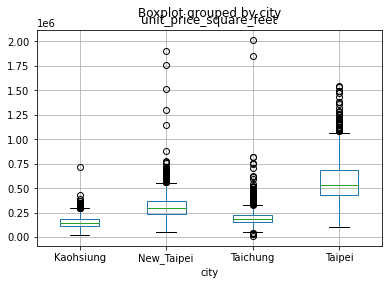

In [26]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
analysis_data.boxplot(column=['unit_price_square_feet'],by='city')

<AxesSubplot:title={'center':'total_price'}, xlabel='room_number'>

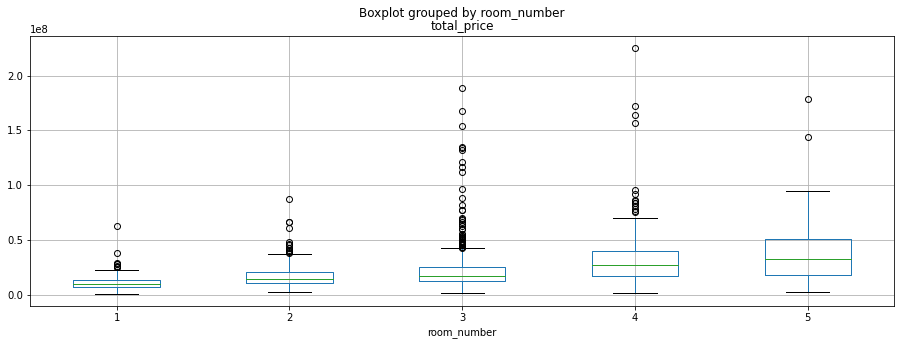

In [28]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
analysis_data.loc[analysis_data.city=='Taipei'].boxplot(column=['total_price'],by='room_number',figsize=(15,5))

In [29]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(analysis_data['towns'].values)
analysis_data['towns_2'] = le.transform(analysis_data['towns'].values)

C:\Users\apply\anaconda3\envs\datascience3.6\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='towns_2'>

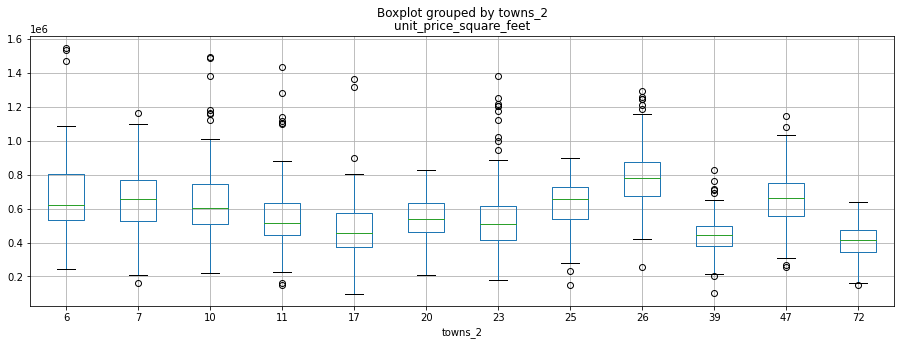

In [30]:
analysis_data.loc[analysis_data.city=='Taipei'].boxplot(column=['unit_price_square_feet'],by='towns_2',figsize=(15,5))